In [1]:
import pandas as pd
import scipy.optimize as optimize
import numpy as np
import numpy as np
import plotly.graph_objects as go
from datetime import datetime
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
relative_path="/content/drive/MyDrive/APM466/A1/11_bonds_data.csv"

In [4]:
data=pd.read_csv(relative_path)

In [5]:
data.head()

,Bond Name,ISIN,Coupon,Issue_date,Maturity_date,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19
0,CAN 2.25 Mar 24,CA135087J546,2.25%,2018-10-05,2024-03-01,99.630,99.640,99.650,99.654,99.671,99.676,99.680,99.677,99.704,99.714
1,CAN 1.5 Sep 24,CA135087J967,1.50%,2019-04-05,2024-09-01,97.800,97.860,97.830,97.830,97.850,97.930,97.890,97.860,97.820,97.850
2,CAN 1.25 Mar 25,CA135087K528,1.25%,2019-10-11,2025-03-01,96.486,96.462,96.517,96.562,96.657,96.698,96.564,96.424,96.431,96.432
3,CAN 0.5 Sep 25,CA135087K940,0.50%,2020-04-03,2025-09-01,94.397,94.331,94.366,94.368,94.525,94.521,94.389,94.162,94.163,94.155
4,CAN 0.25 Mar 26,CA135087L518,0.25%,2020-10-09,2026-03-01,92.885,92.785,92.835,92.850,93.000,92.980,92.835,92.540,92.530,92.510


# Yield Curve

## Calculate YTM

In [6]:
face_value=100
last_coupon_day=datetime(year=2023, month=9, day=1)

In [24]:
def calculate_ytm(face_value, close_price, coupon_rate,maturity_date,cur_date,last_coupon_day,guess=0.03):
  ## calculate dirty price
  dirty_price=(cur_date-last_coupon_day).days/365*face_value*coupon_rate+close_price

  ## calculate coupon
  coupon=face_value*coupon_rate*1/2

  ##calulate periods to maturity
  periods=round((maturity_date-cur_date).days/182,2)

  # sub-period list
  if periods<1:
    dt=[periods]
  else:
    dt=[i+round(periods-int(periods%1),2) for i in range(int(periods))]

  ytm_function=lambda y: sum([coupon/(1+y/2)** t for t in dt])+ face_value/(1+y/2)**periods-dirty_price
  return optimize.newton(ytm_function, guess)

In [25]:
cur_date=list(data.columns[5:16])
list_cur_date=[datetime.strptime(date_string, '%Y-%M-%d') for date_string in cur_date]

In [26]:
dict_bond={}
for index, row in data.iterrows():
  coupon=float(row[2].rstrip('%'))/100
  maturity_date=datetime.strptime(row[4], '%Y-%m-%d')
  list_bond=[]
  list_periods=[]
  price=row.iloc[5:16].tolist()
  for j in range(len(price)):
    ytm=calculate_ytm(face_value,price[j],coupon,maturity_date,list_cur_date[j], last_coupon_day, guess=0.05)
    list_bond.append(ytm)
  bond_name=row[0]
  dict_bond[bond_name]=list_bond


## Calculate Period

In [27]:
mature_date=list(data["Maturity_date"])
list_mat_date=[datetime.strptime(date_string, '%Y-%m-%d') for date_string in mature_date]
list_periods_allbond=[]
for i in range(len(list_mat_date)):
  list_periods_onebond=[]
  for j in range(len(list_cur_date)):
    sub_periods=round((list_mat_date[i]-list_cur_date[j]).days/365,4)
    list_periods_onebond.append(sub_periods)
  list_periods_allbond.append(list_periods_onebond)

index_dict={index: list_periods_allbond for index, list_periods_allbond in zip(list(dict_bond.keys()),list_periods_allbond)}
df_period_plot=pd.DataFrame.from_dict(index_dict).transpose()
df_period_plot.columns=cur_date

In [28]:
df_period_plot

,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19
CAN 2.25 Mar 24,0.1425,0.1397,0.1370,0.1342,0.1315,0.1233,0.1205,0.1178,0.1151,0.1123
CAN 1.5 Sep 24,0.6466,0.6438,0.6411,0.6384,0.6356,0.6274,0.6247,0.6219,0.6192,0.6164
CAN 1.25 Mar 25,1.1425,1.1397,1.1370,1.1342,1.1315,1.1233,1.1205,1.1178,1.1151,1.1123
CAN 0.5 Sep 25,1.6466,1.6438,1.6411,1.6384,1.6356,1.6274,1.6247,1.6219,1.6192,1.6164
CAN 0.25 Mar 26,2.1425,2.1397,2.1370,2.1342,2.1315,2.1233,2.1205,2.1178,2.1151,2.1123
CAN 1.0 Sep 26,2.6466,2.6438,2.6411,2.6384,2.6356,2.6274,2.6247,2.6219,2.6192,2.6164
CAN 0.25 Mar 27,3.1425,3.1397,3.1370,3.1342,3.1315,3.1233,3.1205,3.1178,3.1151,3.1123
CAN 1.0 Sep 27,3.6466,3.6438,3.6411,3.6384,3.6356,3.6274,3.6247,3.6219,3.6192,3.6164
CAN 3.5 Mar 28,4.1452,4.1425,4.1397,4.1370,4.1342,4.1260,4.1233,4.1205,4.1178,4.1151
CAN 3.25 Sep 28,4.6493,4.6466,4.6438,4.6411,4.6384,4.6301,4.6274,4.6247,4.6219,4.6192


## Plot the bond

In [29]:
df_bond_plot=pd.DataFrame.from_dict(dict_bond).transpose()
df_bond_plot.columns=cur_date

In [30]:
df_bond_plot

,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19
CAN 2.25 Mar 24,0.048469,0.049043,0.049660,0.048893,0.048979,0.049046,0.050252,0.049983,0.049243,0.047812
CAN 1.5 Sep 24,0.037754,0.037020,0.037436,0.037665,0.037571,0.036356,0.037243,0.037672,0.038578,0.038008
CAN 1.25 Mar 25,0.038364,0.038552,0.038185,0.037907,0.036999,0.036854,0.038068,0.039518,0.039420,0.039557
CAN 0.5 Sep 25,0.038624,0.039046,0.038927,0.038905,0.037987,0.038221,0.039082,0.040699,0.040684,0.040854
CAN 0.25 Mar 26,0.036474,0.037066,0.036808,0.036814,0.036130,0.036307,0.037136,0.038654,0.038794,0.038894
CAN 1.0 Sep 26,0.032989,0.033587,0.033312,0.033384,0.032684,0.032896,0.033825,0.035330,0.035406,0.035498
CAN 0.25 Mar 27,0.031929,0.032359,0.032262,0.032319,0.031558,0.031521,0.032329,0.033896,0.034005,0.034116
CAN 1.0 Sep 27,0.028102,0.028517,0.028411,0.028554,0.027836,0.027767,0.028539,0.029986,0.030131,0.030289
CAN 3.5 Mar 28,0.026103,0.026561,0.026490,0.026628,0.025973,0.025887,0.026634,0.028040,0.028191,0.028388
CAN 3.25 Sep 28,0.026041,0.026494,0.026421,0.026588,0.025919,0.025850,0.026558,0.027975,0.028123,0.028342


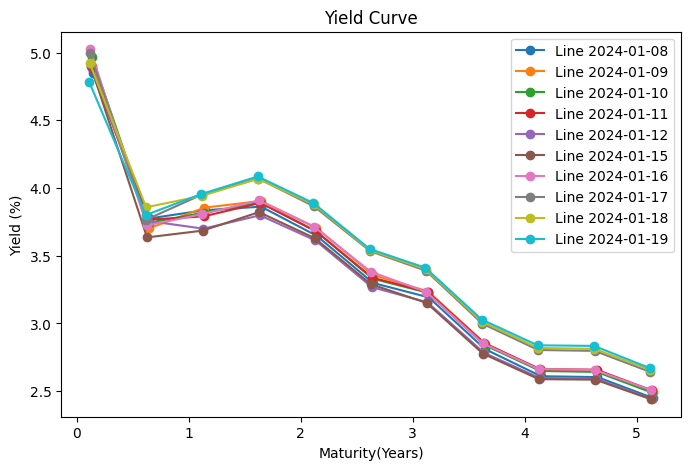

In [141]:
df_bond_plot_100=df_bond_plot*100
# Convert DataFrames to numpy arrays for easier manipulation
x_values = df_period_plot.to_numpy().flatten()
y_values = df_bond_plot_100.to_numpy().flatten()

# Plotting
plt.figure(figsize=(8, 5))
plt.xticks(np.arange(0, 6, 1.0))
for column in df_bond_plot_100.columns:
    # Extract x and y values for the current column
    x_values = df_period_plot[column]
    y_values = df_bond_plot_100[column]

    # Plot the line for the current column
    plt.plot(x_values, y_values, marker='o', label=f'Line {column}')  # 'marker' adds points on the line

# Customizing the plot
plt.title('Yield Curve')
plt.xlabel('Maturity(Years)')
plt.ylabel('Yield (%)')
plt.legend()

# Show the plot
plt.show()

## Interpolation

In [33]:
def find_mid_value(x1, x2, y1, y2, x_new):
  # x1, x2 = 0.6466, 1.1425
  # y1, y2 = 0.037754, 0.038364
  # x_new = 1
  delta_y = y2 - y1
  y_new = - (x2-x_new) / (x2-x1) * delta_y + delta_y + y1
  return y_new

def interpolation(df1, df2, start_row):
  y_new_2D_list = []
  for i in range(start_row, 5):
    x1_list = df1.iloc[2*i+1].tolist()
    x2_list = df1.iloc[2*i+2].tolist()
    y1_list = df2.iloc[2*i+1].tolist()
    y2_list = df2.iloc[2*i+2].tolist()

    x_new = i+1
    y_new_list = []
    for j in range(len(x1_list)):
      x1, x2 = x1_list[j], y2_list[j]
      y1, y2 = y1_list[j], y2_list[j]

      y_new = find_mid_value(x1, x2, y1, y2, x_new)
      y_new_list.append(y_new)
    #print(y_new_list)

    y_new_2D_list.append(y_new_list)

  return y_new_2D_list

In [38]:
list_bond_cov=interpolation(df_period_plot, df_bond_plot, start_row = 0)
df_bond_inter=pd.DataFrame(list_bond_cov)
df_bond_inter.columns=cur_date
df_bond_inter

,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19
0,0.037401,0.036119,0.036990,0.037519,0.037919,0.036041,0.036715,0.036473,0.038024,0.036978
1,0.039096,0.039485,0.039402,0.039377,0.038410,0.038669,0.039542,0.041188,0.041139,0.041331
2,0.033132,0.033754,0.033457,0.033532,0.032841,0.033093,0.034042,0.035539,0.035613,0.035703
3,0.028297,0.028709,0.028602,0.028747,0.028024,0.027961,0.028737,0.030191,0.030337,0.030492
4,0.026158,0.026612,0.026540,0.026707,0.026037,0.025966,0.026676,0.028102,0.028250,0.028477


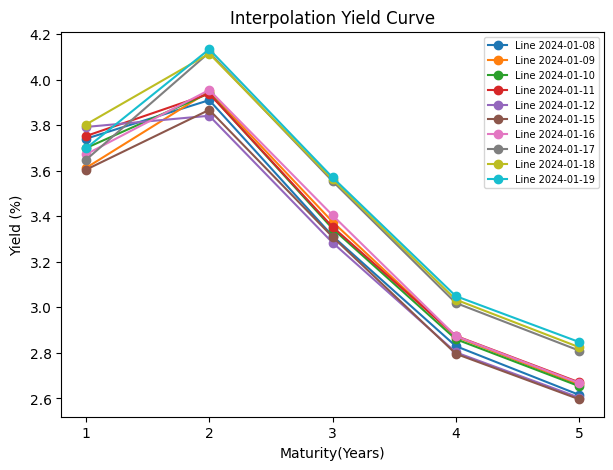

In [183]:
df_bond_inter_100=df_bond_inter*100
# Convert DataFrames to numpy arrays for easier manipulation
x_values = df_period_plot.to_numpy().flatten()
y_values = df_bond_inter_100.to_numpy().flatten()

# Plotting
plt.figure(figsize=(7, 5))
plt.xticks(np.arange(0, 6, 1.0))
for column in df_bond_plot_100.columns:
    # Extract x and y values for the current column
    x_values = [1,2,3,4,5]
    y_values = df_bond_inter_100[column]

    # Plot the line for the current column
    plt.plot(x_values, y_values, marker='o', label=f'Line {column}')  # 'marker' adds points on the line

# Customizing the plot
plt.title('Interpolation Yield Curve')
plt.xlabel('Maturity(Years)')
plt.ylabel('Yield (%)')
plt.legend(prop={'size': 7})

# Show the plot
plt.show()

# Spot Rate & Forward Rate

## Calculate Spot Rate

In [86]:
def calculate_spot_rate(face_value, close_price, coupon_rate,maturity_date,cur_date,last_coupon_day,):
  dirty_price=(cur_date-last_coupon_day).days/365*face_value*coupon_rate+close_price #calculate dirty price
  coupon=face_value*coupon_rate*1/2 # calculate coupon
  periods=round((maturity_date-cur_date).days/182,2) #calulate periods to maturity

  r_t_arr = []
  if periods<1:
    # x = math.log(dirty_price/face_value) / (1* periods)
    current_spot_rate = calculate_r_val(0, dirty_price, face_value, coupon, periods)
    return current_spot_rate*2

  PV_sum = 0
  digit_of_periods = round(periods%1, 3)
  for t in range(int(periods)+1):
    # period_t = 0.3, 1.3, 2.3 ... for example
    period_t = t + digit_of_periods
    current_spot_rate = calculate_r_val(PV_sum, dirty_price, face_value, coupon, period_t)
    r_t_arr.append(current_spot_rate)
    PV_sum += coupon * math.exp(-1 * period_t * current_spot_rate)

  return current_spot_rate*2

def calculate_r_val(PV_sum, dirty_price, face_value, coupon, period_t):
  # r(period_t) = [ln[(dirty - PV_sum)/(face + coupon)]] / (-period_t)
  current_spot_rate = math.log((dirty_price - PV_sum) / (face_value + coupon)) / (-1 * period_t)
  return current_spot_rate



In [88]:
dict_bond_spot={}
for index, row in data.iterrows():
  coupon=float(row[2].rstrip('%'))/100
  maturity_date=datetime.strptime(row[4], '%Y-%m-%d')
  list_spot=[]
  list_periods=[]
  price=row.iloc[5:16].tolist()
  for j in range(len(price)):
    spot=calculate_spot_rate(face_value,price[j],coupon,maturity_date,list_cur_date[j], last_coupon_day)
    list_spot.append(spot)
  bond_name=row[0]
  dict_bond_spot[bond_name]=list_spot

In [89]:
df_bond_spot=pd.DataFrame.from_dict(dict_bond_spot).transpose()
df_bond_spot.columns=cur_date
df_bond_spot

,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19
CAN 2.25 Mar 24,0.047891,0.048451,0.049054,0.048304,0.048389,0.048454,0.049631,0.049368,0.048647,0.047249
CAN 1.5 Sep 24,0.048898,0.048266,0.048674,0.048989,0.048989,0.047889,0.048856,0.049276,0.050262,0.049703
CAN 1.25 Mar 25,0.043577,0.043762,0.043426,0.043177,0.042284,0.042190,0.043386,0.044837,0.044741,0.044901
CAN 0.5 Sep 25,0.039866,0.040280,0.040168,0.040147,0.039249,0.039489,0.040336,0.041929,0.041914,0.042087
CAN 0.25 Mar 26,0.036792,0.037376,0.037122,0.037130,0.036458,0.036634,0.037450,0.038943,0.039083,0.039181
CAN 1.0 Sep 26,0.034984,0.035582,0.035309,0.035385,0.034690,0.034909,0.035835,0.037327,0.037408,0.037499
CAN 0.25 Mar 27,0.034277,0.034706,0.034614,0.034670,0.033916,0.033887,0.034693,0.036260,0.036368,0.036483
CAN 1.0 Sep 27,0.033632,0.034055,0.033956,0.034102,0.033376,0.033322,0.034109,0.035593,0.035740,0.035909
CAN 3.5 Mar 28,0.033280,0.033754,0.033689,0.033832,0.033163,0.033092,0.033865,0.035329,0.035485,0.035698
CAN 3.25 Sep 28,0.032544,0.033014,0.032945,0.033118,0.032431,0.032367,0.033109,0.034586,0.034739,0.034974


## Plot Spot Rates

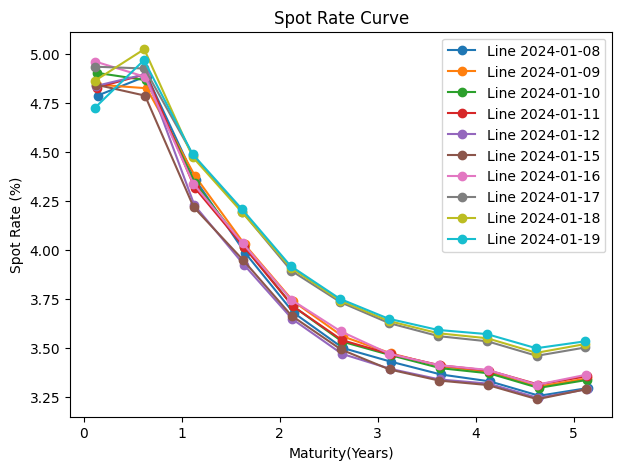

In [186]:
df_bond_spot_100=df_bond_spot*100
# Convert DataFrames to numpy arrays for easier manipulation
x_values = df_period_plot.to_numpy().flatten()
y_values = df_bond_spot_100.to_numpy().flatten()

# Plotting
plt.figure(figsize=(7, 5))
plt.xticks(np.arange(0, 6, 1.0))
for column in df_bond_plot_100.columns:
    # Extract x and y values for the current column
    x_values = df_period_plot[column]
    y_values = df_bond_spot_100[column]

    # Plot the line for the current column
    plt.plot(x_values, y_values, marker='o', label=f'Line {column}')  # 'marker' adds points on the line

# Customizing the plot
plt.title('Spot Rate Curve')
plt.xlabel('Maturity(Years)')
plt.ylabel('Spot Rate (%)')
plt.legend(prop={'size': 10})

# Show the plot
plt.show()

In [171]:
list_spot_cov=interpolation(df_period_plot, df_bond_spot, start_row = 0)
df_spot_inter=pd.DataFrame(list_spot_cov)
df_spot_inter.columns=cur_date
df_spot_inter

,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19
0,0.052016,0.050940,0.051826,0.052521,0.053108,0.051518,0.052387,0.052185,0.053922,0.052927
1,0.040540,0.040924,0.040850,0.040828,0.039885,0.040157,0.041018,0.042643,0.042596,0.042794
2,0.035079,0.035701,0.035405,0.035484,0.034798,0.035056,0.036001,0.037484,0.037561,0.037649
3,0.033666,0.034085,0.033982,0.034129,0.033398,0.033346,0.034135,0.035620,0.035767,0.035932
4,0.032514,0.032982,0.032914,0.033085,0.032397,0.032326,0.033068,0.034551,0.034703,0.034945


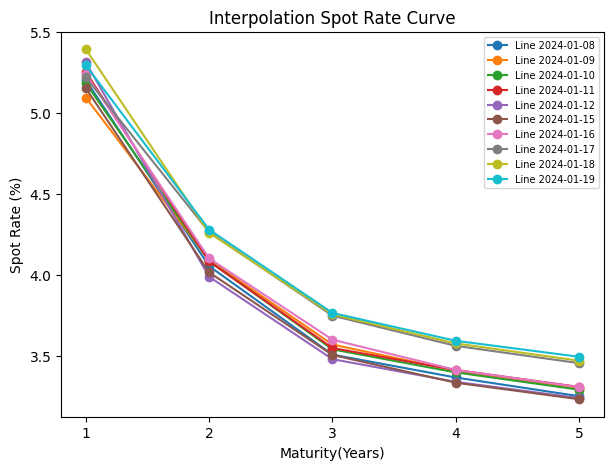

In [187]:
df_spot_inter_100=df_spot_inter*100
# Convert DataFrames to numpy arrays for easier manipulation
x_values = df_period_plot.to_numpy().flatten()
y_values = df_spot_inter_100.to_numpy().flatten()

# Plotting
plt.figure(figsize=(7, 5))
plt.xticks(np.arange(0, 6, 1.0))
for column in df_bond_plot_100.columns:
    # Extract x and y values for the current column
    x_values = [1,2,3,4,5]
    y_values = df_spot_inter_100[column]

    # Plot the line for the current column
    plt.plot(x_values, y_values, marker='o', label=f'Line {column}')  # 'marker' adds points on the line

# Customizing the plot
plt.title('Interpolation Spot Rate Curve')
plt.xlabel('Maturity(Years)')
plt.ylabel('Spot Rate (%)')
plt.legend(prop={'size': 7})

# Show the plot
plt.show()

## Calculate Forward Rate

In [155]:
def calculate_forward(df):
  list_forward_rate=[]
  index_list=[[0,1],[0,2],[0,3],[0,4]]
  for index in index_list:
    t=index[0]
    tn=index[1]
    spot_t = df.iloc[t].tolist()
    spot_t1 = df.iloc[tn].tolist()
    print(spot_t1)
    print(spot_t)
    forward_rate = [(((1+spot_t1[j])**(tn+1)) / ((1+spot_t[j]))**(t+1))**(1/(tn-t)) - 1 for j in range(len(spot_t))]
    list_forward_rate.append(forward_rate)
  return list_forward_rate

In [146]:
list_spot_5yr=interpolation(df_period_plot, df_bond_spot, start_row = 0)
df_spot_inter=pd.DataFrame(list_spot_5yr)
df_spot_inter.columns=cur_date
df_spot_inter

,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19
0,0.052016,0.050940,0.051826,0.052521,0.053108,0.051518,0.052387,0.052185,0.053922,0.052927
1,0.040540,0.040924,0.040850,0.040828,0.039885,0.040157,0.041018,0.042643,0.042596,0.042794
2,0.035079,0.035701,0.035405,0.035484,0.034798,0.035056,0.036001,0.037484,0.037561,0.037649
3,0.033666,0.034085,0.033982,0.034129,0.033398,0.033346,0.034135,0.035620,0.035767,0.035932
4,0.032514,0.032982,0.032914,0.033085,0.032397,0.032326,0.033068,0.034551,0.034703,0.034945


In [156]:
list_forward=calculate_forward(df_spot_inter)
df_forwad_plot=pd.DataFrame(list_forward)
df_forwad_plot.columns=cur_date
index_mapping = {0: 'Year2', 1: 'Year3', 2: 'Year4', 3: 'Year5'}
df_forwad_plot = df_forwad_plot.rename(index=index_mapping)

[0.04054022657392289, 0.040923686334894974, 0.04085006591971562, 0.0408280195398101, 0.03988455630428571, 0.04015735647060539, 0.04101765160106269, 0.04264275663952063, 0.04259639293991183, 0.04279350281141147]
[0.052016246514338185, 0.050940237461810214, 0.05182638689737561, 0.05252054824684016, 0.053107765555561064, 0.05151798153884651, 0.05238715319299493, 0.052185345249710545, 0.053922051919864586, 0.052926575597961156]
[0.03507931138898881, 0.035701179808571334, 0.03540486572088716, 0.035484262976101265, 0.03479800712008171, 0.035056048596676395, 0.036000864212122036, 0.037483558745826706, 0.037561030210274474, 0.03764949790209672]
[0.052016246514338185, 0.050940237461810214, 0.05182638689737561, 0.05252054824684016, 0.053107765555561064, 0.05151798153884651, 0.05238715319299493, 0.052185345249710545, 0.053922051919864586, 0.052926575597961156]
[0.03366629003463619, 0.03408477011094217, 0.033982148533444306, 0.034128542667002805, 0.03339792212106458, 0.03334550358100747, 0.0341346

## Plot Forward rate

In [157]:
df_forwad_plot

,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19
Year2,0.029189,0.031003,0.029988,0.029265,0.026827,0.028919,0.029771,0.033187,0.031392,0.032758
Year3,0.026713,0.028165,0.027290,0.027070,0.025763,0.026922,0.027904,0.030210,0.029476,0.030094
Year4,0.027621,0.028527,0.028102,0.028070,0.026910,0.027358,0.028121,0.030157,0.029785,0.030328
Year5,0.027695,0.028541,0.028239,0.028283,0.027283,0.027583,0.028293,0.030189,0.029953,0.030497


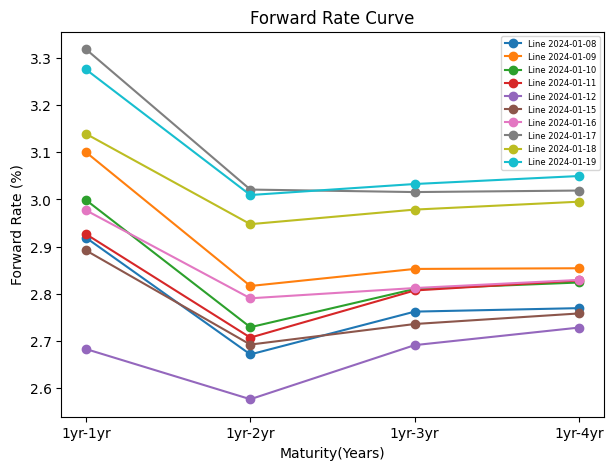

In [174]:
df_forwad_plot_100=df_forwad_plot*100
# Convert DataFrames to numpy arrays for easier manipulation
x_values = df_period_plot.to_numpy().flatten()
y_values = df_forwad_plot_100.to_numpy().flatten()

# Plotting
plt.figure(figsize=(7, 5))
plt.xticks(np.arange(0, 6, 1.0))
for column in df_bond_plot_100.columns:
    # Extract x and y values for the current column
    x_values = ['1yr-1yr','1yr-2yr','1yr-3yr','1yr-4yr']
    y_values = df_forwad_plot_100[column]

    # Plot the line for the current column
    plt.plot(x_values, y_values, marker='o', label=f'Line {column}')  # 'marker' adds points on the line

# Customizing the plot
plt.title('Forward Rate Curve')
plt.xlabel('Maturity(Years)')
plt.ylabel('Forward Rate (%)')
plt.legend(loc='upper right',prop={'size': 6})

# Show the plot
plt.show()

# Covariance Matrix

## Calculate Covariance

In [115]:
def calculate_covariance(df_ytm):
  df_cov=pd.DataFrame()
  for i in range(len(df_ytm.columns) - 1):
    col_name = 'cov%i' % i
    #print(col_name)
    df_cov[str(col_name)] = np.log(df_ytm.iloc[:, i+1] / df_ytm.iloc[:, i])
  df_cov=df_cov.to_numpy()
  return np.cov(df_cov)

## Yield: Covariance Matrix and Eigenvalues and Eigenvectors

In [139]:
df_bond_inter

,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19
0,0.037401,0.036119,0.036990,0.037519,0.037919,0.036041,0.036715,0.036473,0.038024,0.036978
1,0.039096,0.039485,0.039402,0.039377,0.038410,0.038669,0.039542,0.041188,0.041139,0.041331
2,0.033132,0.033754,0.033457,0.033532,0.032841,0.033093,0.034042,0.035539,0.035613,0.035703
3,0.028297,0.028709,0.028602,0.028747,0.028024,0.027961,0.028737,0.030191,0.030337,0.030492
4,0.026158,0.026612,0.026540,0.026707,0.026037,0.025966,0.026676,0.028102,0.028250,0.028477


In [137]:
df_ytm_cov=calculate_covariance(df_bond_inter)

# Calculate Eignvector and Eignvalues
ytm_val, ytm_vec= np.linalg.eig(df_ytm_cov)

In [138]:
pd.DataFrame(df_ytm_cov)

,0,1,2,3,4
0,0.000945,-0.000122,-0.000136,-0.000043,-0.000056
1,-0.000122,0.000326,0.000338,0.000368,0.000377
2,-0.000136,0.000338,0.000370,0.000391,0.000400
3,-0.000043,0.000368,0.000391,0.000440,0.000452
4,-0.000056,0.000377,0.000400,0.000452,0.000466


In [177]:
ytm_val

array([1.61693710e-03, 9.09849474e-04, 2.88679647e-08, 1.19525914e-05,
       8.55390923e-06])

In [136]:
pd.DataFrame(ytm_vec)

,0,1,2,3,4
0,0.251045,-0.962772,0.032094,-0.085090,-0.042135
1,-0.441530,-0.065170,0.116615,-0.083930,-0.883267
2,-0.470755,-0.061866,0.138764,-0.802161,0.334431
3,-0.502456,-0.183866,-0.801951,0.227538,0.137234
4,-0.517644,-0.176602,0.568322,0.538962,0.295612


In [178]:
ytm_vec

array([[ 0.25104529, -0.96277234,  0.03209438, -0.08509   , -0.04213459],
       [-0.44152963, -0.06516963,  0.11661538, -0.08393008, -0.88326729],
       [-0.47075547, -0.06186571,  0.13876445, -0.80216108,  0.33443078],
       [-0.50245572, -0.18386563, -0.80195079,  0.22753765,  0.13723422],
       [-0.51764407, -0.17660238,  0.56832223,  0.53896164,  0.29561191]])

## Forward Rates: Covariance Matrix and Eigenvalues and Eigenvectors

In [128]:
df_forward_cov=calculate_covariance(df_forwad_plot)

# Calculate Eignvector and Eignvalues
forward_val,forward_vec= np.linalg.eig(df_forward_cov)

In [129]:
pd.DataFrame(df_forward_cov)

,0,1,2,3
0,0.004325,0.001052,0.000495,0.000926
1,0.001052,0.000683,0.000192,0.000350
2,0.000495,0.000192,0.000656,0.000405
3,0.000926,0.000350,0.000405,0.000376


In [175]:
forward_val

array([4.91124270e-03, 7.35835025e-04, 3.86126394e-04, 7.53850215e-06])

In [131]:
pd.DataFrame(forward_vec)

,0,1,2,3
0,0.930117,0.281683,0.216038,-0.094149
1,0.256168,-0.199242,-0.926376,-0.191071
2,0.140926,-0.841604,0.306913,-0.421483
3,0.222260,-0.415525,-0.030978,0.881465
